# Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Changing th default figure size for graphs
font = {"weight": "bold",
        "size": 16}
plt.rcParams["figure.figsize"] = (14,8)
plt.rc("font", **font)

# Importing dataset

In [2]:
df = pd.read_excel("california_gas_prices_2000-2023.xlsx")

In [3]:
df.head()

,Date,Weekly California Regular All Formulations Retail Gasoline Prices (Dollars per Gallon)
0,2000-05-22,1.634
1,2000-05-29,1.626
2,2000-06-05,1.613
3,2000-06-12,1.614
4,2000-06-19,1.618


## Renaming gas prices column 

In [4]:
df = df.rename(columns={df.columns[0]: "date", df.columns[1]: "gas_prices_weekly"})
df.head()

,date,gas_prices_weekly
0,2000-05-22,1.634
1,2000-05-29,1.626
2,2000-06-05,1.613
3,2000-06-12,1.614
4,2000-06-19,1.618


# Data cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1185 entries, 0 to 1184
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               1185 non-null   datetime64[ns]
 1   gas_prices_weekly  1183 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 18.6 KB


In [6]:
df[df["gas_prices_weekly"].isna()]

,date,gas_prices_weekly
1183,2023-01-23,NaN
1184,2023-01-30,NaN


- Decided to drop null values as there are only 2 

In [7]:
df = df.dropna()
df.isna().sum()

date                 0
gas_prices_weekly    0
dtype: int64

# Feature Engineering

In [8]:
df.head()

,date,gas_prices_weekly
0,2000-05-22,1.634
1,2000-05-29,1.626
2,2000-06-05,1.613
3,2000-06-12,1.614
4,2000-06-19,1.618


In [9]:
df = df.set_index(df["date"])
df.head()

,date,gas_prices_weekly
date,,
2000-05-22,2000-05-22,1.634
2000-05-29,2000-05-29,1.626
2000-06-05,2000-06-05,1.613
2000-06-12,2000-06-12,1.614
2000-06-19,2000-06-19,1.618


In [10]:
df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month
df["week"] = df["date"].dt.week

df.head()

/opt/anaconda3/envs/dojo-env/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,date,gas_prices_weekly,year,month,week
date,,,,,
2000-05-22,2000-05-22,1.634,2000,5,21
2000-05-29,2000-05-29,1.626,2000,5,22
2000-06-05,2000-06-05,1.613,2000,6,23
2000-06-12,2000-06-12,1.614,2000,6,24
2000-06-19,2000-06-19,1.618,2000,6,25


In [11]:
df = df.drop(columns="date")
df.head()

,gas_prices_weekly,year,month,week
date,,,,
2000-05-22,1.634,2000,5,21
2000-05-29,1.626,2000,5,22
2000-06-05,1.613,2000,6,23
2000-06-12,1.614,2000,6,24
2000-06-19,1.618,2000,6,25



# EDA

In [54]:
mean_year = df.groupby(["year"]).mean()["gas_prices_weekly"]

Text(0, 0.5, 'Amount in USD ($)')

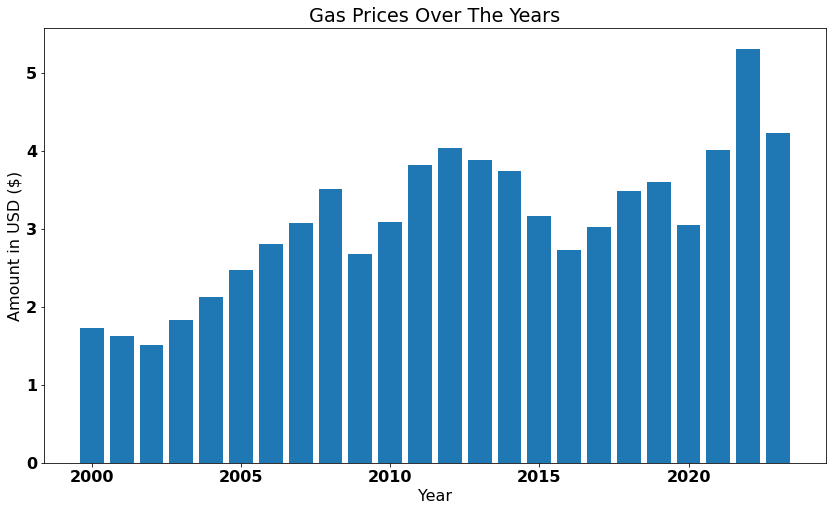

In [73]:
plt.bar(mean_year.index, mean_year[:])
plt.title("Gas Prices Over The Years")
plt.xlabel("Year")
plt.ylabel("Amount in USD ($)")

- A clear trend is gas prices continue to rise.

- The general trend seems to be that gas steadily rises to new heights then takes a hit and falls. Then continues the same pattern over the years.

In [70]:
mean_month = df.groupby(["month"]).mean()["gas_prices_weekly"]

<BarContainer object of 12 artists>

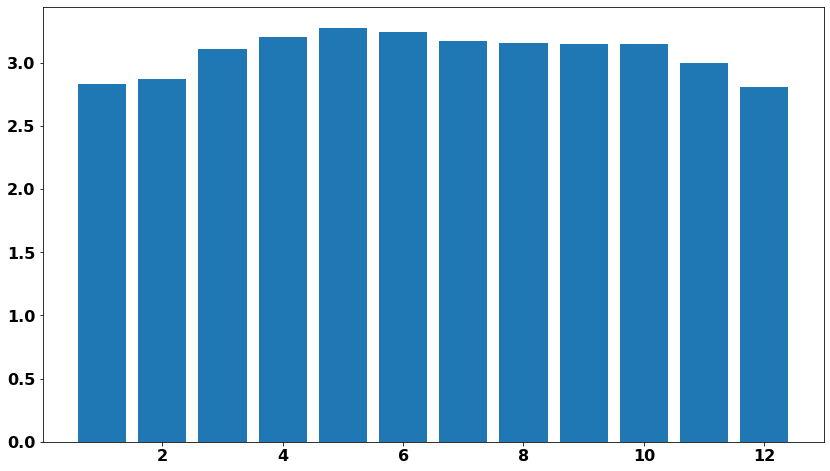

In [74]:
plt.bar(mean_month.index, mean_month[:])